In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')
import omama as O
import pickle
from hyperopt import hp, rand, fmin, Trials
from pyod.models.hbos import HBOS

In [3]:
# load data and labels

with open('/raid/mpsych/datasetB.pkl','rb') as f:
    datasetA = pickle.load(f)
    
with open('/raid/mpsych/datasetB_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [4]:
print(len(datasetA), len(labels))

100 100


In [5]:
# determine the hyperparameter space

param_grid = {
    'contamination': hp.uniform('contamination', 0.07, .1),
    'n_bins': hp.uniformint('n_bins', 1, 50),
    'alpha': hp.uniform('alpha', 0.0, 1.0),
    'tol': hp.uniform('tol', 0.0, 1.0),
}

In [6]:
hyperOpt = O.HyperTuner(
    algorithm=HBOS,
    param_space=param_grid,
    feature_type='hist',
    norm_type='gaussian',
    data=datasetA,
    gt_labels=labels,
    max_evals=60,
    timing=True,
    sigma=10
)

HyperTuner initializing, please be patient...
HyperTuner init time: 445.2156 seconds
HyperTuner init memory: 6479524
 MB


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:17<00:00,  3.34trial/s, best loss: -0.8875]
Best parameters:
alpha: 0.6517423997488939
contamination: 0.09651779876417847
n_bins: 31.0
tol: 0.8136554076402878


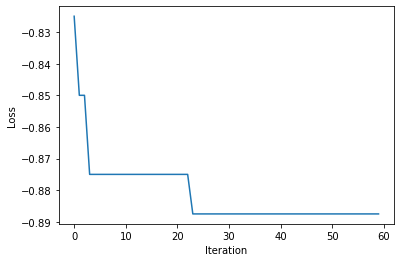

In [8]:
hyperOpt.optimize()

In [9]:
hyperOpt.display_best_params()

Best parameters:
alpha: 0.6517423997488939
contamination: 0.09651779876417847
n_bins: 31.0
tol: 0.8136554076402878


In [10]:
hyperOpt.print_param_space()

Parameter space:
contamination: ['0.07', '0.1']
n_bins: ['1', '50', '1.0']
alpha: ['0.0', '1.0']
tol: ['0.0', '1.0']
